### 헬스장 데이터 통한 소모 칼로리 예측

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [4]:
from sklearn.metrics import *
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}')

In [5]:
df=pd.read_csv("gym_members_exercise_tracking.csv")

In [43]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

None

In [7]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


### data preprocessing

**사용할 column만 선택**

In [8]:
# label= Calories_Burned
# input = Fat_Percentage , Water_Intake
input_data=df[["Fat_Percentage","Water_Intake (liters)"]]
label_data=df["Calories_Burned"]
input_data.shape ,label_data.shape

((973, 2), (973,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label_data, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
X_train_scaled=stand_scaler.fit_transform(X_train)
X_test_scaled=stand_scaler.transform(X_test)

**산점도로 체지방률과 칼로리 사이 관계 확인**

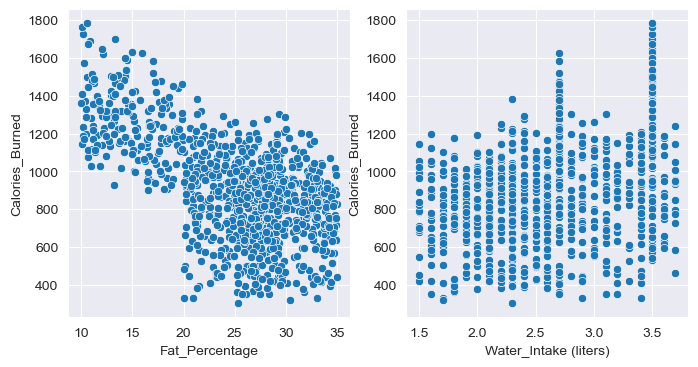

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
sns.scatterplot(data=df,x="Fat_Percentage",y="Calories_Burned",ax=ax[0])
sns.scatterplot(data=df,x="Water_Intake (liters)",y="Calories_Burned",ax=ax[1])
plt.show()

**HeatMap ( x=Fat_Percentage . y=Calories_Burned )**

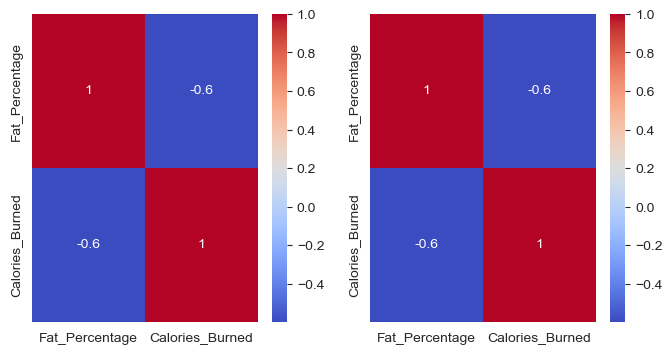

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
heatmap_data = pd.DataFrame({'Water_Intake (liters)': df["Water_Intake (liters)"], 'Calories_Burned': label_data})

heatmap_data = pd.DataFrame({'Fat_Percentage': df["Fat_Percentage"], 'Calories_Burned': label_data})
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm',ax=ax[0])
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm',ax=ax[1])
plt.show()

### 회귀 모델로 score 파악하기

In [15]:
from sklearn.linear_model import LinearRegression

lr_clf=LinearRegression()
lr_clf.fit(X_train_scaled,y_train)
print(lr_clf.score(X_train_scaled,y_train))
print(lr_clf.score(X_test_scaled,y_test))

0.35752967067870245
0.3524768142297252


In [16]:
# 다항회귀

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([
    # (이름, 객체)
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])

model.fit(X_train, y_train) # 다항변환후 학습
print(model.score(X_train, y_train), model.score(X_test, y_test))
y_pred = model.predict(X_test)
evaluate_regression(y_test, y_pred)

0.4105955957546027 0.4095038396517924
MSE: 42818.539604174286, MAE: 166.36690925929983, RMSE: 206.92641108416848, R2: 0.4095038396517924


##### 다른 데이터 type과 -- 칼로리소모의 관계

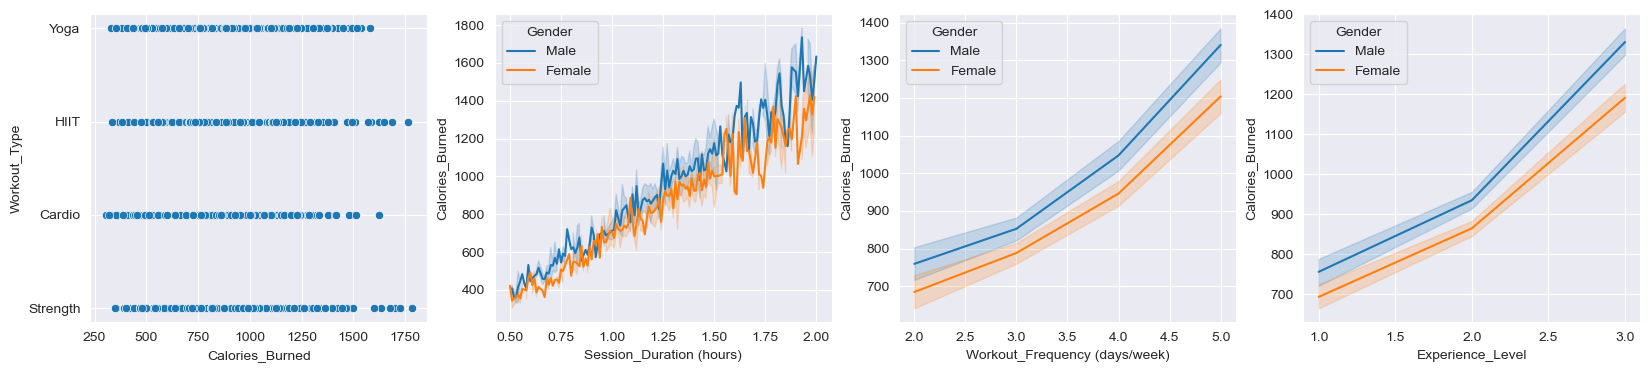

In [42]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

sns.scatterplot(data=df,x="Calories_Burned", y="Workout_Type",ax=ax[0])
sns.lineplot(data=df,x="Session_Duration (hours)", y="Calories_Burned",ax=ax[1],hue="Gender")
sns.lineplot(data=df, x="Workout_Frequency (days/week)", y="Calories_Burned",ax=ax[2],hue="Gender")
sns.lineplot(data=df,x="Experience_Level", y="Calories_Burned",hue="Gender")
plt.show()